C:\Users\kavee\AppData\Local\Temp\ipykernel_15476\2717194506.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined["Potability"] = combined["Potability"].replace({


Merged dataset saved successfully!
    pH    DO  BOD  Conductivity  Nitrate  Fecal_Coliform  Turbidity  \
0  8.0   9.0  0.1          85.0      0.2           106.0   3.258728   
1  8.0   9.0  0.3         102.0      0.4           153.0   3.745824   
2  8.0   9.0  0.2          96.0      0.3            58.0   1.984716   
3  8.0   9.0  0.2          94.0      0.4            34.0   2.885716   
4  8.0  10.0  0.2         112.0      0.5           213.0   1.548326   

   Potability  
0           1  
1           1  
2           1  
3           1  
4           1  
Merged dataset saved successfully!
    pH    DO  BOD  Conductivity  Nitrate  Fecal_Coliform  Turbidity  \
0  8.0   9.0  0.1          85.0      0.2           106.0   3.258728   
1  8.0   9.0  0.3         102.0      0.4           153.0   3.745824   
2  8.0   9.0  0.2          96.0      0.3            58.0   1.984716   
3  8.0   9.0  0.2          94.0      0.4            34.0   2.885716   
4  8.0  10.0  0.2         112.0      0.5           2

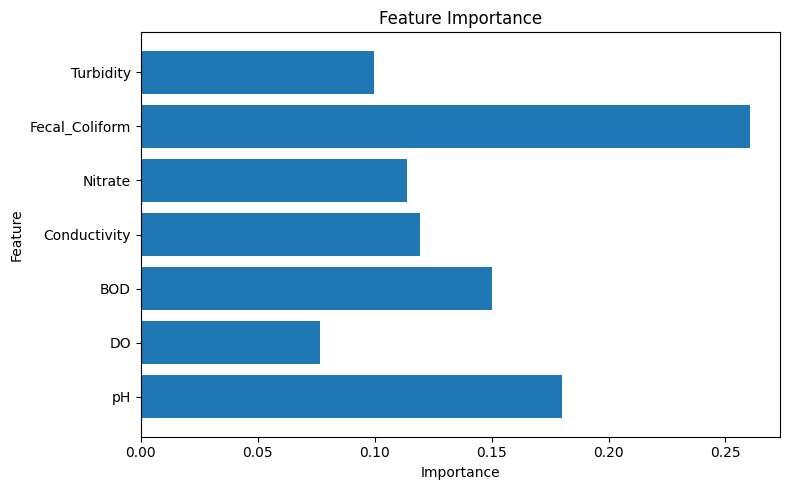

C:\Users\kavee\AppData\Local\Temp\ipykernel_15476\2717194506.py:181: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Potability"] = df["Potability"].replace({


AquaAttributes Dataset Accuracy: 0.9743
Water Potability Dataset Accuracy: 0.9103
Dataset B Synthetic Accuracy: 0.9996
Dataset C Hybrid Accuracy: 1.0000


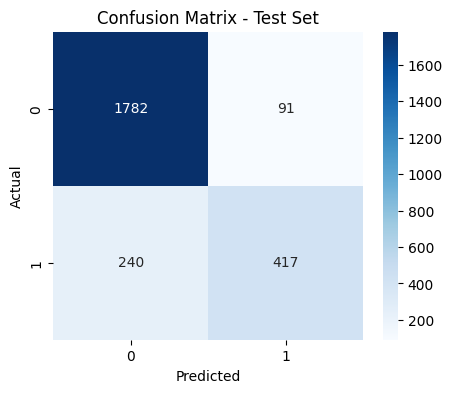

C:\Users\kavee\AppData\Local\Temp\ipykernel_15476\2717194506.py:181: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Potability"] = df["Potability"].replace({


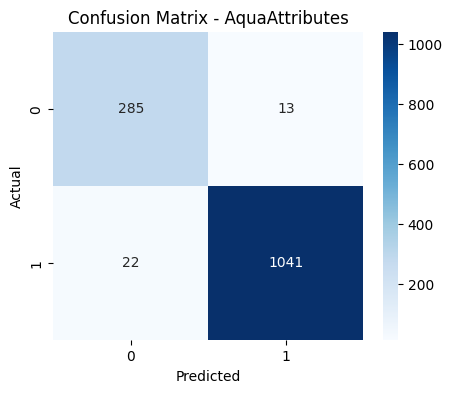

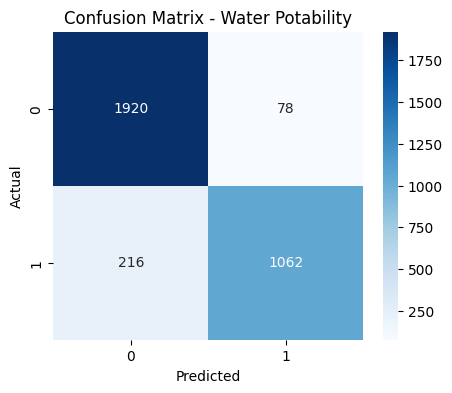

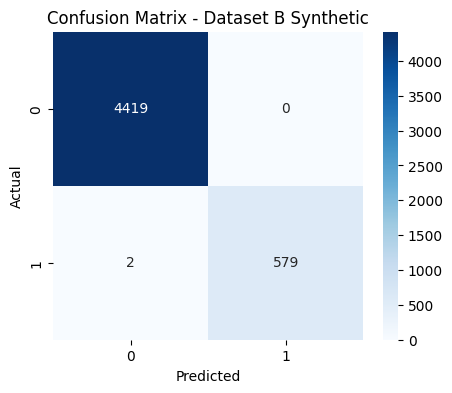

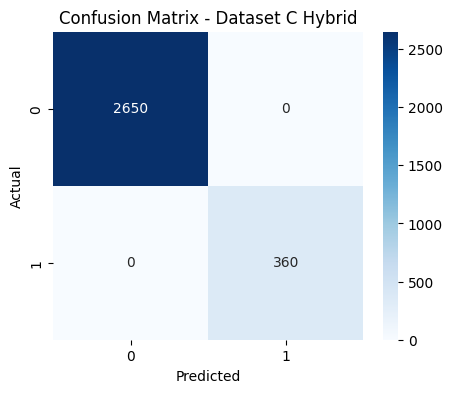

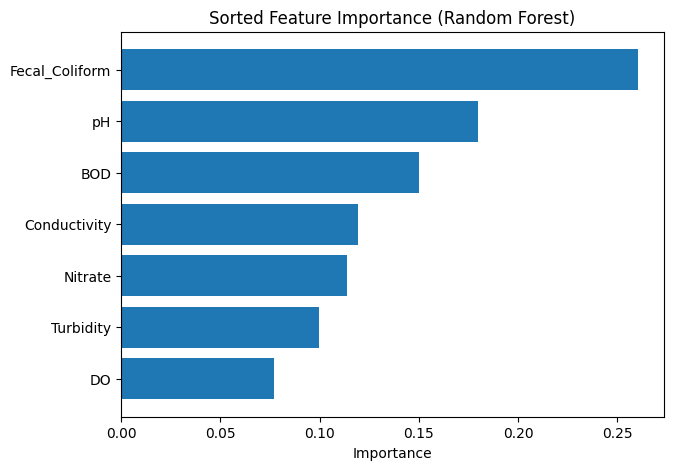

C:\Users\kavee\AppData\Local\Temp\ipykernel_15476\2717194506.py:181: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Potability"] = df["Potability"].replace({


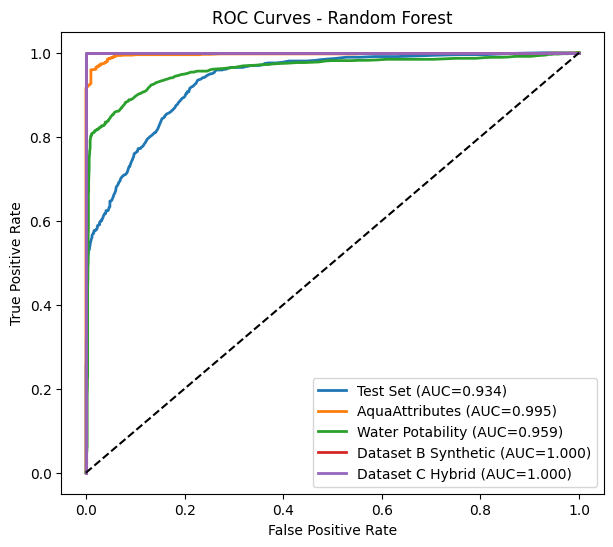

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Improved RF Accuracy: 0.8707509881422925


ModuleNotFoundError: No module named 'xgboost'

In [5]:
import pandas as pd
import numpy as np

# ================================
# 1. Load datasets with your paths
# ================================
aqua = pd.read_csv(r"C:\Users\kavee\Downloads\aquaattributes.csv")
pot = pd.read_csv(r"C:\Users\kavee\Downloads\code\testing_datasets\water_potability.csv")
dsB = pd.read_csv(r"C:\Users\kavee\Downloads\code\testing_datasets\dataset_B_synthetic.csv")
dsC = pd.read_csv(r"C:\Users\kavee\Downloads\code\testing_datasets\dataset_C_hybrid.csv")

# ================================
# 2. Clean aquaattributes dataset
# ================================
aqua = aqua.drop(columns=["Unnamed: 15"], errors="ignore")

aqua = aqua.rename(columns={
    "D.O": "DO",
    "B.O.D": "BOD",
    "Fecalcaliform": "Fecal_Coliform",
    "class": "Potability"
})

aqua = aqua[["pH", "DO", "BOD", "Conductivity", "Nitrate", "Fecal_Coliform", "Potability"]]

aqua["Turbidity"] = np.nan

# ================================
# 3. Align potability dataset
# ================================
pot = pot.rename(columns={"ph": "pH"})

missing_cols_pot = ["DO", "BOD", "Nitrate", "Fecal_Coliform"]
for col in missing_cols_pot:
    pot[col] = np.nan

pot = pot[["pH", "DO", "BOD", "Conductivity", "Nitrate", "Turbidity", "Fecal_Coliform", "Potability"]]

# ================================
# 4. Dataset B & C (already aligned)
# ================================
dsB = dsB[["pH", "DO", "BOD", "Conductivity", "Nitrate", "Turbidity", "Fecal_Coliform", "Potability"]]
dsC = dsC[["pH", "DO", "BOD", "Conductivity", "Nitrate", "Turbidity", "Fecal_Coliform", "Potability"]]

# ================================
# 5. Merge all datasets
# ================================
combined = pd.concat([aqua, pot, dsB, dsC], ignore_index=True)

# ========================================
# 6. CLEAN invalid strings BEFORE imputation
# ========================================
combined = combined.replace(['-', '--', 'NA', 'N/A', 'Na', '', ' '], np.nan)

# Convert Potability to numeric
combined["Potability"] = combined["Potability"].replace({
    "yes": 1, "Yes": 1, "YES": 1,
    "no": 0, "No": 0, "NO": 0,
    "safe": 1, "unsafe": 0
})

combined["Potability"] = pd.to_numeric(combined["Potability"], errors="coerce")

# ========================================
# 7. Separate features and target BEFORE KNN
# ========================================
X = combined.drop(columns=["Potability"])
y = combined["Potability"]

# Convert all feature columns to numeric
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# ========================================
# 8. Apply KNN Imputer ONLY on features
# ========================================
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_filled = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ========================================
# 9. Rebuild merged final dataset
# ========================================
combined_filled = pd.concat([X_filled, y], axis=1)

# ========================================
# 10. Save
# ========================================
combined_filled.to_csv(
    r"C:\Users\kavee\Downloads\codemerged_dataset.csv",
    index=False
)

print("Merged dataset saved successfully!")
print(combined_filled.head())

# ================================
# 8. Save merged dataset to your PC
# ================================
combined_filled.to_csv(
    r"C:\Users\kavee\Downloads\codemerged_dataset.csv",
    index=False
)

print("Merged dataset saved successfully!")
print(combined_filled.head())


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load merged dataset
df = pd.read_csv(r"C:\Users\kavee\Downloads\code\merged_dataset.csv")

# Features and target
X = df.drop(columns=["Potability"])
y = df["Potability"]

# ----------------------------
# 1. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 2. Train Random Forest
# ----------------------------
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

model.fit(X_train, y_train)

# ----------------------------
# 3. Evaluate on test set
# ----------------------------
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------------
# 4. 5-fold Cross Validation
# ----------------------------
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Accuracy:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# ----------------------------
# 5. Feature Importance
# ----------------------------
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

FEATURE_ORDER = ["pH", "DO", "BOD", "Conductivity", "Nitrate", "Fecal_Coliform", "Turbidity"]

def clean_dataset(df, imputer):
    # Replace invalid string placeholders
    df = df.replace(['-', '--', 'NA', 'N/A', 'Na', '', ' '], np.nan)

    # Convert labels
    if "Potability" in df.columns:
        df["Potability"] = df["Potability"].replace({
            "yes": 1, "Yes": 1, "YES": 1,
            "no": 0, "No": 0, "NO": 0,
            "safe": 1, "unsafe": 0
        })
        df["Potability"] = pd.to_numeric(df["Potability"], errors="coerce")

    # Convert all feature cols to numeric
    for col in df.columns:
        if col != "Potability":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # 🟦 FORCE THE CORRECT COLUMN ORDER
    df = df[FEATURE_ORDER + ["Potability"]]

    X_raw = df[FEATURE_ORDER]
    y_raw = df["Potability"]

    # Impute using SAME imputer
    X_clean = pd.DataFrame(imputer.transform(X_raw), columns=FEATURE_ORDER)

    return X_clean, y_raw

def evaluate_dataset(df, name, imputer, model):
    X_clean, y_clean = clean_dataset(df, imputer)
    y_pred = model.predict(X_clean)
    acc = accuracy_score(y_clean, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


# Load original aligned datasets AGAIN (same processing as earlier)
evaluate_dataset(aqua, "AquaAttributes Dataset", imputer, model)
evaluate_dataset(pot, "Water Potability Dataset", imputer, model)
evaluate_dataset(dsB, "Dataset B Synthetic", imputer, model)
evaluate_dataset(dsC, "Dataset C Hybrid", imputer, model)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Overall test set confusion matrix
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Test Set")

# Per dataset confusion matrices
for df, name in [(aqua, "AquaAttributes"),
                 (pot, "Water Potability"),
                 (dsB, "Dataset B Synthetic"),
                 (dsC, "Dataset C Hybrid")]:
    X_clean, y_clean = clean_dataset(df, imputer)
    y_pred_ds = model.predict(X_clean)
    plot_confusion_matrix(y_clean, y_pred_ds, f"Confusion Matrix - {name}")

    import numpy as np

indices = np.argsort(importances)
plt.figure(figsize=(7,5))
plt.barh(np.array(feature_names)[indices], importances[indices])
plt.title("Sorted Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

from sklearn.metrics import roc_curve, auc

def plot_roc(X, y, model, label):
    probs = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC={roc_auc:.3f})")

plt.figure(figsize=(7,6))

# Overall
plot_roc(X_test, y_test, model, "Test Set")

# Per dataset
for df, name in [(aqua, "AquaAttributes"),
                 (pot, "Water Potability"),
                 (dsB, "Dataset B Synthetic"),
                 (dsC, "Dataset C Hybrid")]:
    X_clean, y_clean = clean_dataset(df, imputer)
    plot_roc(X_clean, y_clean, model, name)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Random Forest")
plt.legend()
plt.show()

#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_base = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    rf_base, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=1, n_jobs=-1
)

rf_search.fit(X_train, y_train)

print("Best RF Parameters:", rf_search.best_params_)

best_rf = rf_search.best_estimator_

y_pred_best = best_rf.predict(X_test)
print("Improved RF Accuracy:", accuracy_score(y_test, y_pred_best))

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": model,
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8
    ),
    "SVM (RBF)": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Show comparison
plt.figure(figsize=(7,5))
plt.bar(results.keys(), results.values(), color='teal')
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()